## 1. Элементарная модель классификации

### 1.1 Ирисы

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display

from sklearn.datasets import load_iris
#plt.style.use('classic')

Используем датасет <code>iris</code> и случайный лес. Обучимся и посмотрим результат.

Правильность на тренировочных данных: 1.00
Правильность на тестовых данных: 0.92


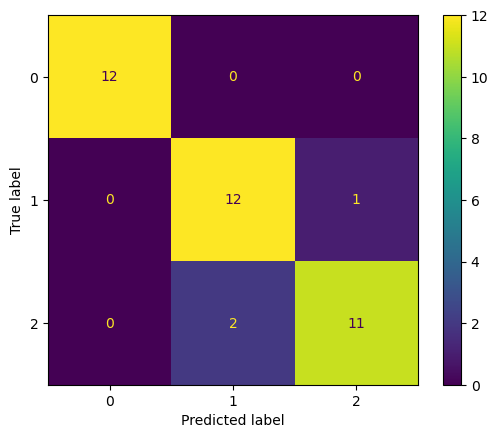

In [2]:
data = load_iris()
X, y = pd.DataFrame(data.data, columns = data.feature_names), data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, 
                                                    stratify = y)

forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print("Правильность на тренировочных данных: {:.2f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовых данных: {:.2f}".format(forest.score(X_test, y_test)))


ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot();

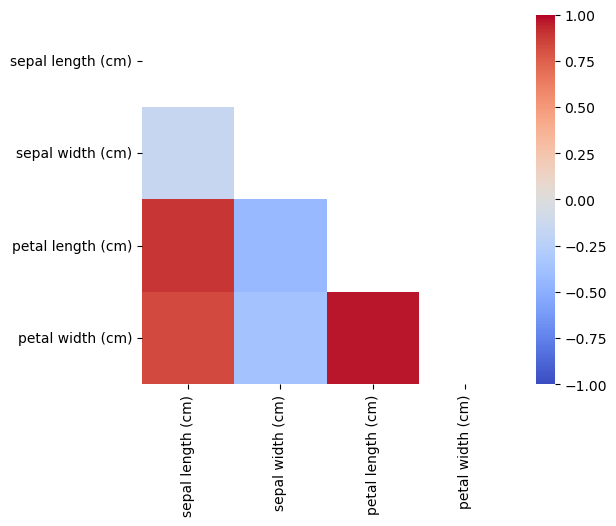

In [3]:
import seaborn as sns

corr = X_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            mask=mask,
            square=True,
            vmin = -1, vmax = 1,
           cmap ='coolwarm')
plt.show()

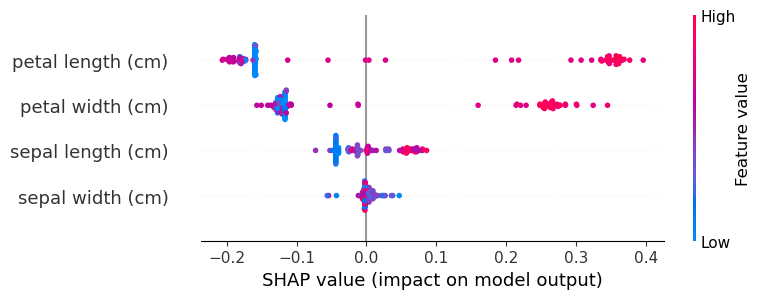

In [4]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(forest, X_train)
shap_values = explainer.shap_values(X_train, check_additivity = False)

feature_names = data.feature_names
shap.summary_plot(shap_values[:,:,2], X_train, feature_names=feature_names)

In [5]:
shap_values = explainer.shap_values(X_train,check_additivity=False)
shap_values
shap.force_plot(explainer.expected_value[0], shap_values[:,:,2], X_train)

In [6]:
i=0
shap.force_plot(
    explainer.expected_value[0], 
    shap_values[i,:,2], 
    X_test.iloc[i,:])

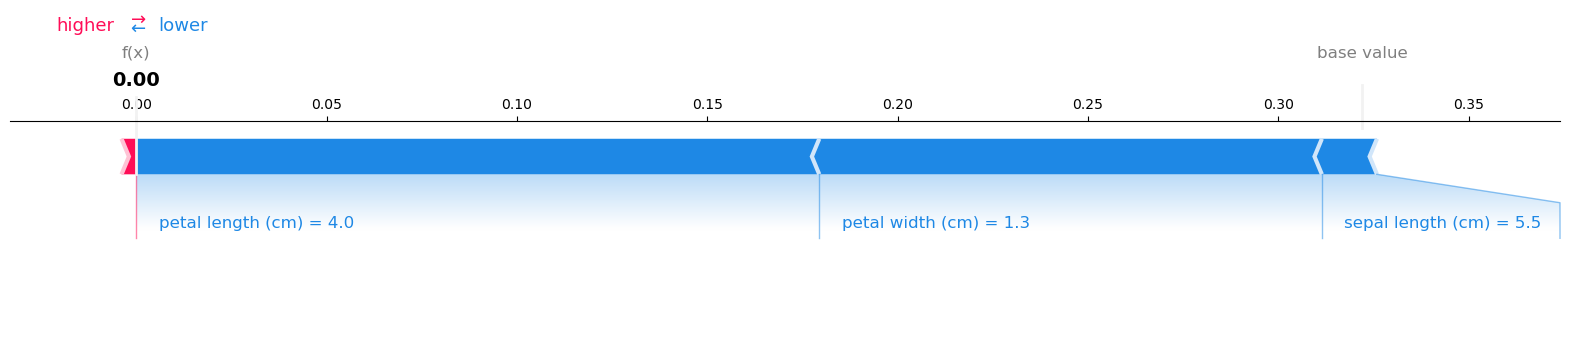

In [7]:
k=2
i=3

shap.force_plot(
    explainer.expected_value[k], 
    shap_values[i,:,k], 
    X_test.iloc[i,:],
    matplotlib=True)

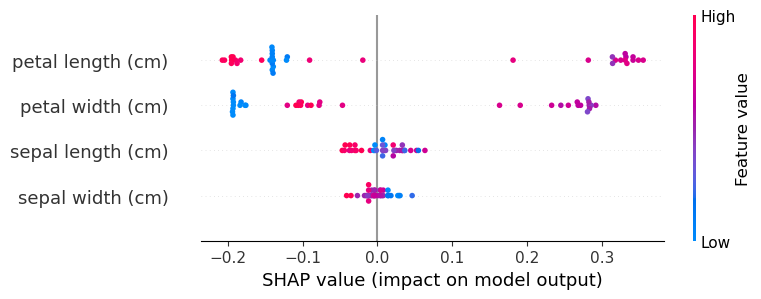

In [8]:
shap_values = explainer.shap_values(X_test, 
                                    check_additivity=False
                                   )
shap.summary_plot(shap_values[:,:,1], X_test)